In [19]:
import numpy as np
import torch
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def prepare_input_for_graph(image, patch_size, k_neighbors):
    # Step 1: Extract patches and compute features
    patches = extract_patches(image, patch_size)
    features = [extract_feature(patch) for patch in patches]
    X = torch.stack(features)

    # Step 2: Construct graph
    graph = construct_graph(X, k_neighbors)

    return graph

In [3]:
def extract_patches(image, patch_size):
    h, w, _ = image.shape
    patches = []

    for i in range(0, h - patch_size + 1, patch_size):
        for j in range(0, w - patch_size + 1, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size, :]
            patches.append(patch)

    return patches


def extract_feature(patch):
    # Assuming 'patch' is a 3-dimensional NumPy array (height x width x channels)

    # Flatten the patch into a 1D array (vector)
    flattened_patch = patch.reshape(-1, patch.shape[-1])

    # Calculate the color histogram for each channel (R, G, B)
    hist_r, _ = np.histogram(flattened_patch[:, 0], bins=256, range=(0, 256))
    hist_g, _ = np.histogram(flattened_patch[:, 1], bins=256, range=(0, 256))
    hist_b, _ = np.histogram(flattened_patch[:, 2], bins=256, range=(0, 256))

    # Concatenate the histograms to create the feature vector
    feature_vector = np.concatenate((hist_r, hist_g, hist_b))

    # Convert to PyTorch tensor and normalize
    feature_tensor = torch.tensor(feature_vector, dtype=torch.float32)
    feature_tensor /= torch.sum(feature_tensor)  # Normalize the feature vector

    return feature_tensor


def feature_extraction(patches):
    features = []

    for patch in patches:
        # Assuming you have a function to convert a patch to a feature vector using PyTorch
        # Replace with actual feature extraction code
        feature = extract_feature(patch)
        features.append(feature)

    return features


def construct_graph(features, k_neighbors):
    graph = nx.Graph()

    # Finding k-nearest neighbors
    neighbors_model = NearestNeighbors(
        n_neighbors=k_neighbors, metric='euclidean')
    neighbors_model.fit(features)
    distances, indices = neighbors_model.kneighbors(features)

    # Adding edges to the graph based on k-nearest neighbors
    for i, neighbors in enumerate(indices):
        for neighbor in neighbors:
            graph.add_edge(i, neighbor)

    return graph

In [4]:
def view_patches(patches, num_rows, num_cols, patch_size):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j 
            ax = axes[i, j]
            ax.imshow(patches[index])
            ax.axis('off')

    plt.tight_layout()
    plt.show()
    

def save_graph_as_png(graph, filename):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=300)
    plt.savefig(filename)
    print('Graph saved to {}'.format(filename))

In [5]:
def view_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()


def view_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=300)
    plt.show()

In [41]:
def superimpose_graph_on_image(image, graph, patch_size):
    # Create a copy of the original image
    image_with_graph = np.copy(image)

    # Calculate the layout for the graph nodes (assuming you have a graph layout algorithm)
    pos = nx.spring_layout(graph)

    # Calculate the scaling factor to convert graph coordinates to image coordinates
    scale_factor_x = image.shape[1] / patch_size
    scale_factor_y = image.shape[0] / patch_size

    # Adjust the graph node positions to match the image coordinates
    pos_scaled = {node: (x * scale_factor_x, y * scale_factor_y)
                  for node, (x, y) in pos.items()}

    # Draw the graph nodes and edges onto the image copy
    fig, ax = plt.subplots(
        figsize=(image.shape[1] / 100, image.shape[0] / 100))
    ax.imshow(image_with_graph)
    nx.draw(graph, pos=pos_scaled, with_labels=False, font_weight='bold',
            node_size=50, ax=ax, node_color='r', edge_color='g')

    return image_with_graph


TEST THE FUNCTIONS ABOVE

In [42]:
# Example usage
image_path = 'fish.jpg'
image = plt.imread(image_path)  # Load image as a NumPy array
patch_size = 64
k_neighbors = 5

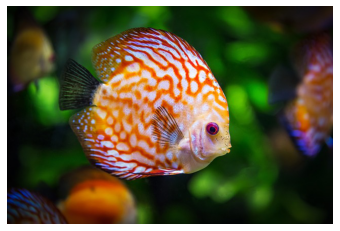

In [43]:
# Visualize image and graph
view_image(image)

In [44]:
# Assuming 'image' is your input image array and 'patch_size' is the desired patch size
patches = extract_patches(image, patch_size)
features = feature_extraction(patches)
X = torch.stack(features)  # Convert to a PyTorch tensor

In [45]:
# Assuming 'k_neighbors' is the desired number of nearest neighbors
graph = construct_graph(X, k_neighbors)

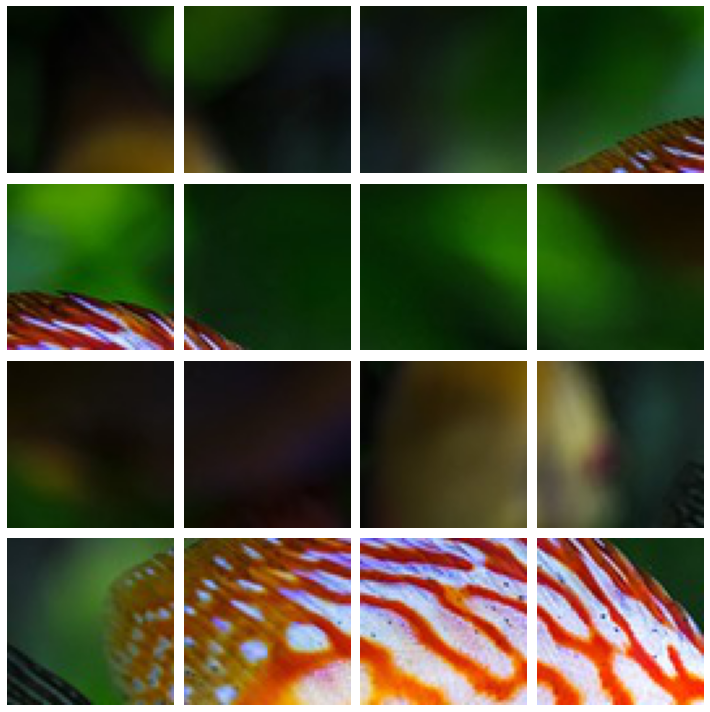

In [46]:
# Assuming 'patches' is a list of image patches, 'num_rows' and 'num_cols' determine the grid layout,
# and 'patch_size' is the size of the patches
view_patches(patches, num_rows=4, num_cols=4, patch_size=128)

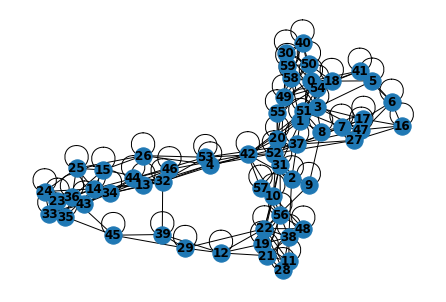

In [47]:
view_graph(graph)

Graph saved to graph.png


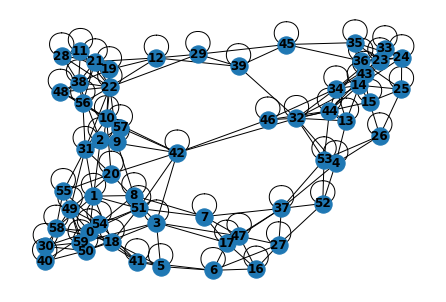

In [48]:
# Assuming 'graph' is the NetworkX graph and 'filename' is the desired name for the PNG file
save_graph_as_png(graph, filename='graph.png')